In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [2]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_median.csv')

In [3]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X.shape

(1781, 7)

In [5]:
y.shape

(1781,)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(1424, 7)

In [8]:
X_test.shape

(357, 7)

In [9]:
y_train.shape

(1424,)

In [10]:
y_test.shape

(357,)

In [11]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape

(1424, 7)

In [13]:
X_test.shape

(357, 7)

In [14]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
X_train.shape

(1424, 7, 1)

In [16]:
X_test.shape

(357, 7, 1)

In [17]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [18]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            16512     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 128)           0

In [20]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/100
45/45 [==============================] - 2s 14ms/step - loss: 48371.2422 - val_loss: 38454.1094
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 16723.4785 - val_loss: 15845.0547
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 7803.6187 - val_loss: 9263.3535
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 6134.9819 - val_loss: 6184.1255
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 6128.8091 - val_loss: 6676.5698
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 4866.8569 - val_loss: 5023.1333
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 3896.6440 - val_loss: 3806.0239
Epoch 8/100
45/45 [==============================] - 0s 6ms/step - loss: 3330.4207 - val_loss: 2954.9229
Epoch 9/100
45/45 [==============================] - 0s 6ms/step - loss: 1789.4554 - val_loss: 2332.9277
Epoch 10/100
45/45 [==============================

In [21]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

12/12 [==============================] - 0s 3ms/step - loss: 2.6312
Mean squared error: 2.6312289237976074


In [22]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 174ms/step
Predicted WQI: 71.31369


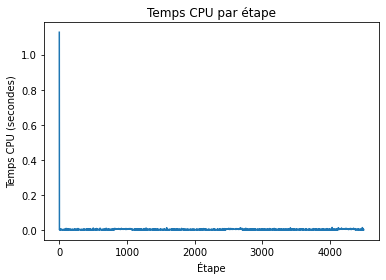

In [23]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le **moyenne**

In [25]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean.csv')

In [26]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [30]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [31]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [32]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])

Epoch 1/100
45/45 [==============================] - 2s 19ms/step - loss: 9796445.0000 - val_loss: 7491755.5000
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 6856612.5000 - val_loss: 4367387.5000
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 2953125.2500 - val_loss: 1194084.2500
Epoch 4/100
45/45 [==============================] - 0s 7ms/step - loss: 986655.4375 - val_loss: 738643.0625
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 790264.5625 - val_loss: 674111.9375
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 652951.6875 - val_loss: 495349.7500
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 487577.6875 - val_loss: 348545.2500
Epoch 8/100
45/45 [==============================] - 0s 7ms/step - loss: 328835.5000 - val_loss: 237826.3281
Epoch 9/100
45/45 [==============================] - 0s 7ms/step - loss: 205634.9219 - val_loss: 126917.5469
Epoch 10/100

In [33]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

12/12 [==============================] - 0s 3ms/step - loss: 219.2521
Mean squared error: 219.2521209716797


In [34]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 239ms/step
Predicted WQI: 78.87249


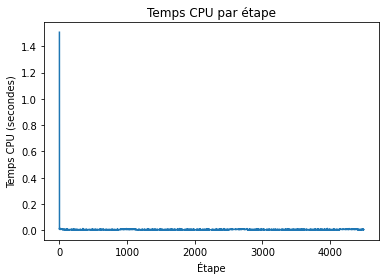

In [35]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le plus **freuent**

In [36]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [37]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [41]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [42]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [43]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/100
45/45 [==============================] - 4s 29ms/step - loss: 44910.3672 - val_loss: 36115.1836
Epoch 2/100
45/45 [==============================] - 0s 7ms/step - loss: 15583.7910 - val_loss: 15259.2959
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 7828.9756 - val_loss: 7595.0728
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 5785.8296 - val_loss: 6160.3511
Epoch 5/100
45/45 [==============================] - 0s 7ms/step - loss: 5922.7773 - val_loss: 6537.4116
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 5088.1226 - val_loss: 4513.5898
Epoch 7/100
45/45 [==============================] - 0s 7ms/step - loss: 3553.2075 - val_loss: 3066.0942
Epoch 8/100
45/45 [==============================] - 0s 7ms/step - loss: 2111.5283 - val_loss: 1696.8173
Epoch 9/100
45/45 [==============================] - 0s 8ms/step - loss: 1072.4241 - val_loss: 870.4266
Epoch 10/100
45/45 [==============================]

In [44]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

12/12 [==============================] - 0s 3ms/step - loss: 6.7986
Mean squared error: 6.798583984375


In [45]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 229ms/step
Predicted WQI: 71.40617


# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [47]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [48]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [52]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [53]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [54]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])

Epoch 1/100
42/42 [==============================] - 3s 39ms/step - loss: 154841.0781 - val_loss: 83507.3984
Epoch 2/100
42/42 [==============================] - 1s 21ms/step - loss: 92307.7422 - val_loss: 42596.2812
Epoch 3/100
42/42 [==============================] - 1s 18ms/step - loss: 46691.8906 - val_loss: 18653.6406
Epoch 4/100
42/42 [==============================] - 1s 16ms/step - loss: 19496.6738 - val_loss: 8847.9541
Epoch 5/100
42/42 [==============================] - 1s 14ms/step - loss: 11498.9639 - val_loss: 8989.4746
Epoch 6/100
42/42 [==============================] - 1s 15ms/step - loss: 9274.5225 - val_loss: 8179.5381
Epoch 7/100
42/42 [==============================] - 1s 14ms/step - loss: 8802.1729 - val_loss: 6622.1851
Epoch 8/100
42/42 [==============================] - 0s 11ms/step - loss: 8026.4521 - val_loss: 6273.3271
Epoch 9/100
42/42 [==============================] - 0s 10ms/step - loss: 7367.2349 - val_loss: 5820.4912
Epoch 10/100
42/42 [=================

In [55]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

11/11 [==============================] - 0s 3ms/step - loss: 9.5877
Mean squared error: 9.587747573852539


In [56]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 134ms/step
Predicted WQI: 72.01725
